# Name : K.Rishitha

# Project : Detecting fake news

# **Objective**
# Analyze Uber rides to detect patterns and relationships between different variables using Python.

## Steps involved

Data Loading and Exploration

*  Data Reading:
Start by reading the dataset and displaying the records to understand its structure. This step involves loading the data into a Pandas DataFrame and checking the first few rows to get a sense of the data.

*  Data Analysis:

1.   Pattern Dettection:Uncover hidden patterns in the data using data analysis techniques. This may involve identifying peak ride hours, popular pickup locations, or the distribution of ride durations. You can also use statistical methods to analyze trends in the data.

2.   Relationship identification:
Identify relationships between variables such as date, time, location, and ride demand. For example, you can analyze whether there is a correlation between the time of day and the number of rides or if certain locations have higher demand during specific time periods.
*  Data Visualization:
Graphs and charts
Visualize the relationships discovered through graphs and charts. Tools like Matplotlib and Seaborn are useful for creating visualizations that help convey the insights from your analysis effectively.

## Data Loading and Exploration

In [1]:
#To read the dataset
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Read the dataset
uber_df= pd.read_csv("uber-raw-data-sep14.csv")

#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [9]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
657934,9/2/2014 9:39:00,40.7740,-73.9787,B02682
657935,9/2/2014 9:39:00,40.7378,-73.9739,B02682
657936,9/2/2014 9:39:00,40.7565,-73.9745,B02682
657937,9/2/2014 9:40:00,40.7370,-73.9742,B02682
657938,9/2/2014 9:40:00,40.7316,-73.9933,B02682


# **Data Analysis**

In [10]:
#Find the shape of the dataset
uber_df.shape

(657939, 4)

In [11]:
#Understand the dataset properties
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657939 entries, 0 to 657938
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  657939 non-null  object 
 1   Lat        657939 non-null  float64
 2   Lon        657939 non-null  float64
 3   Base       657939 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.1+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [12]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


## Data Visualization:

<ipython-input-24-0b7234ee1984>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


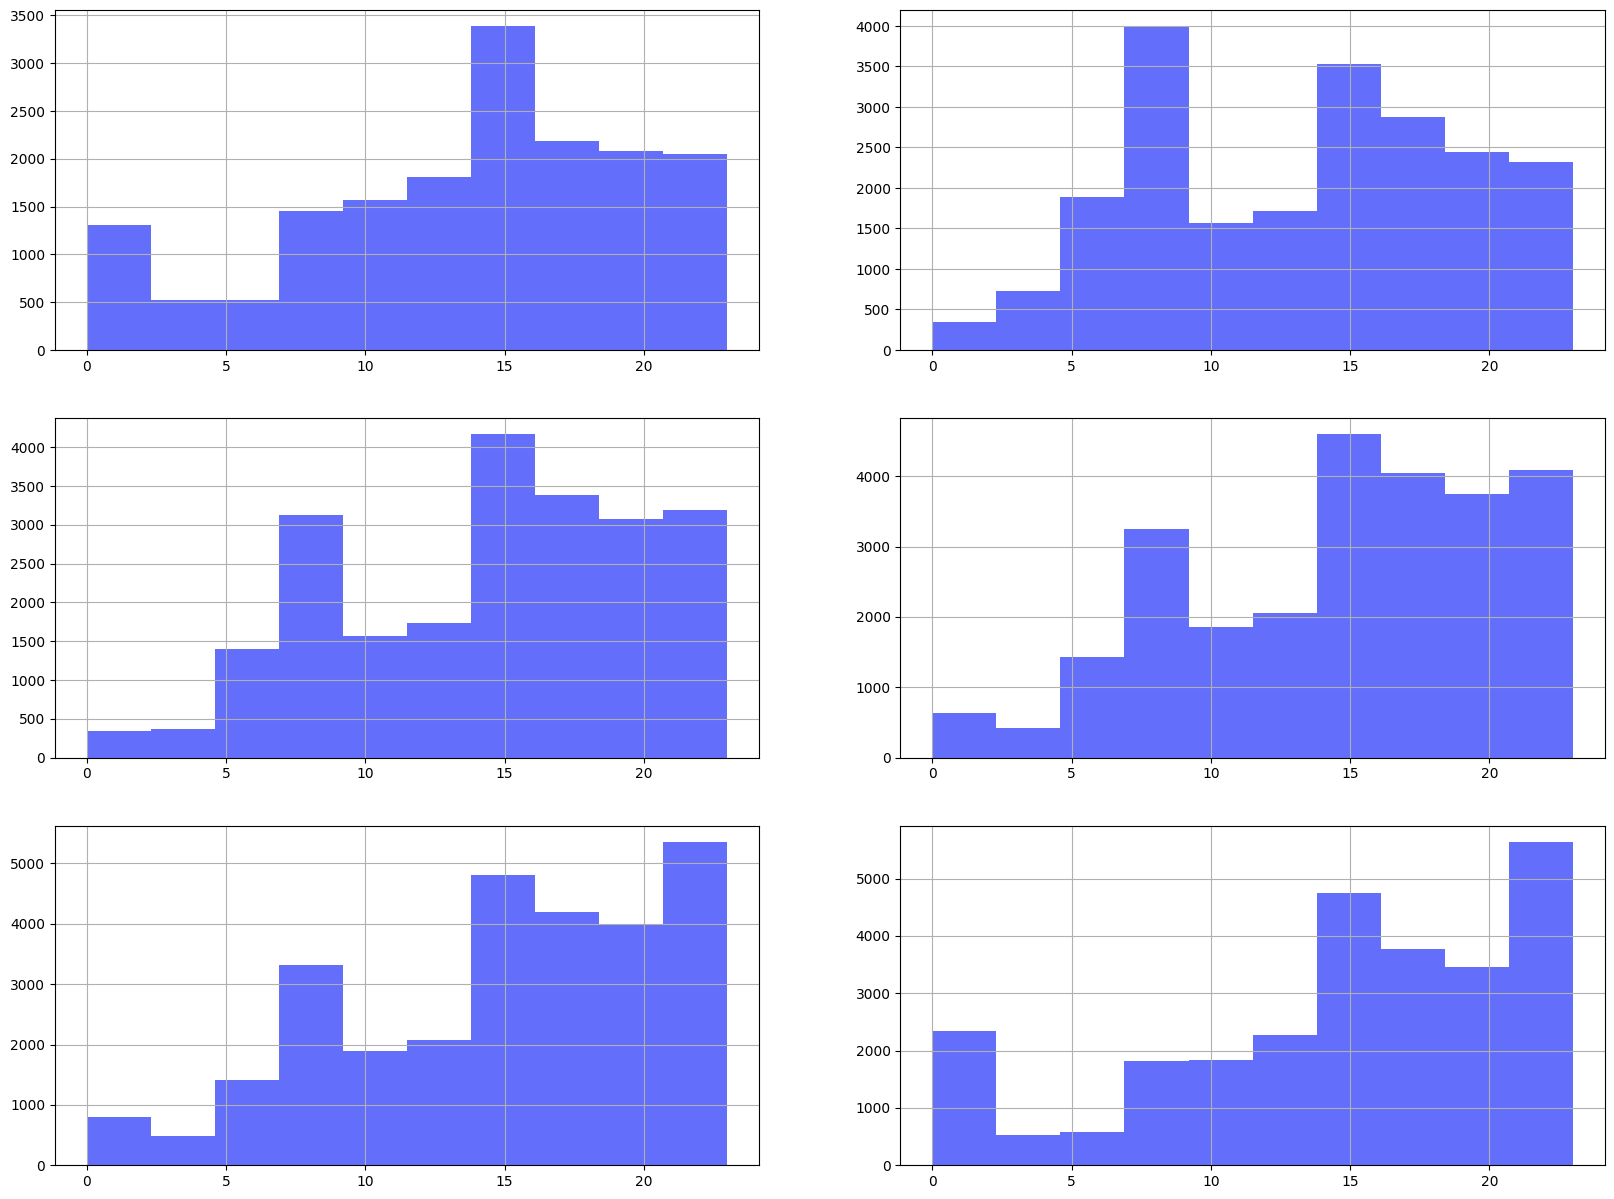

In [24]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize = (20, 15))

unique_days = uber_df['Day'].unique()

# If you have more than 6 unique days, consider modifying the layout or creating multiple plots
for i, month in enumerate(unique_days[:6]):
    plt.subplot(3, 2, i+1)
    uber_df[uber_df['Day'] == month]['Hour'].hist(color=colors)

plt.show()


#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

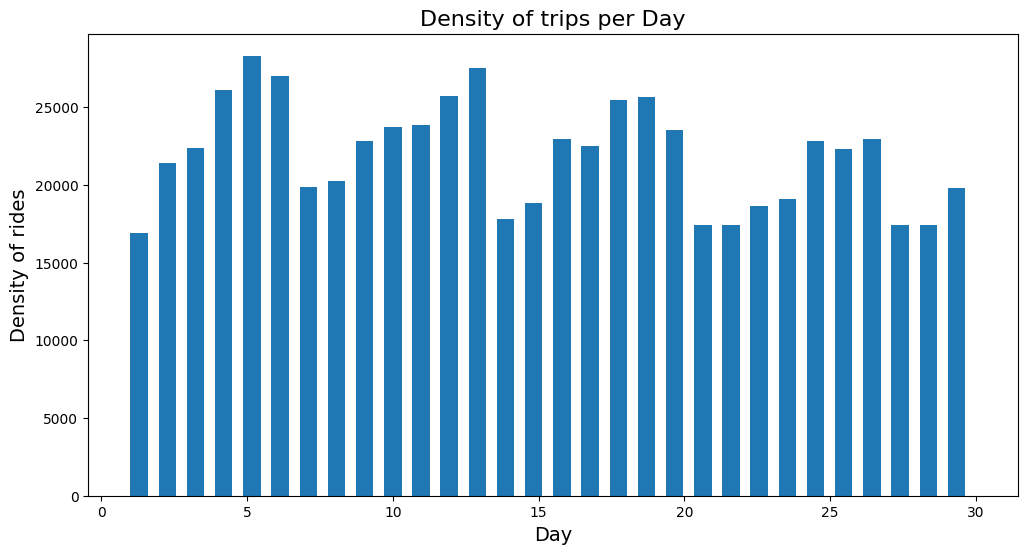

In [13]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

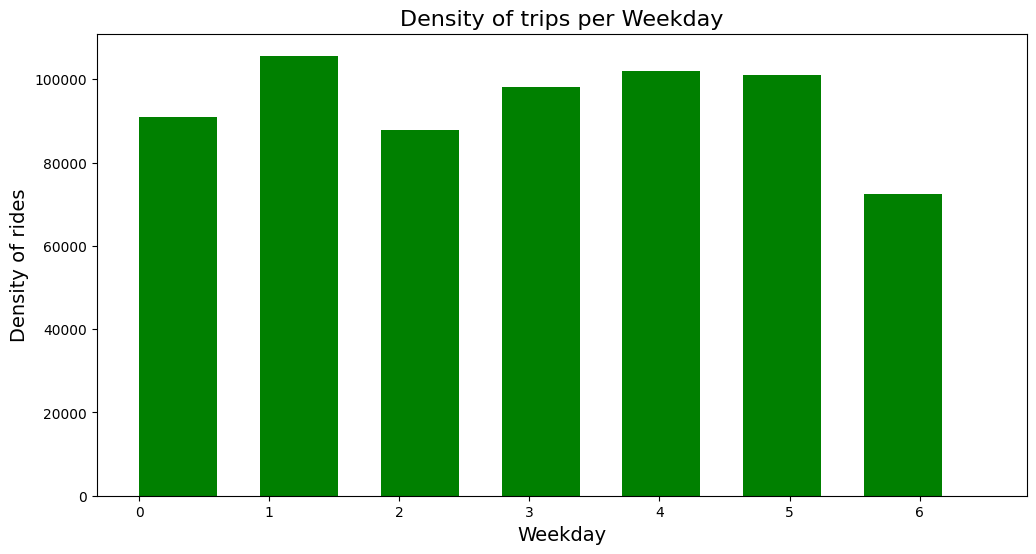

In [14]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

Text(0, 0.5, 'Density of rides')

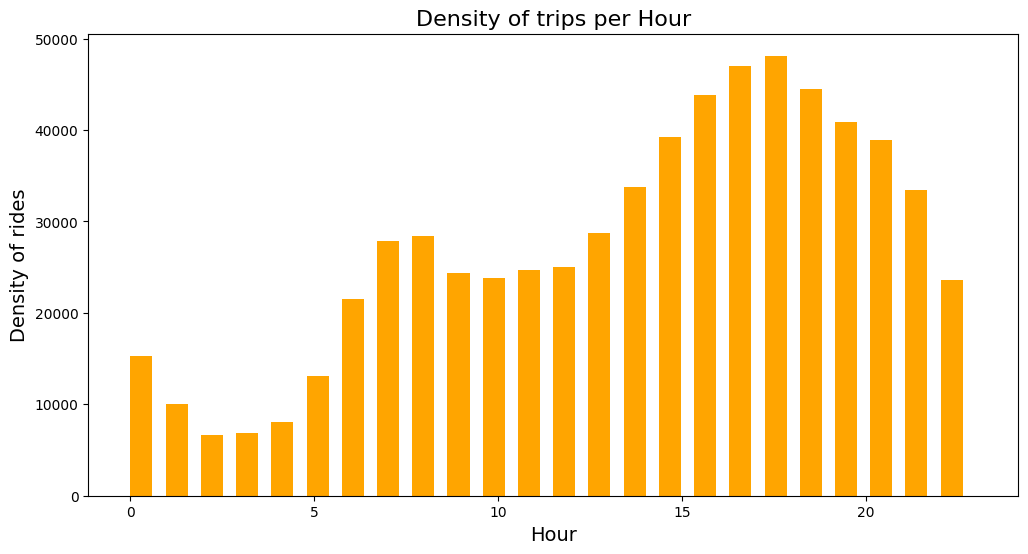

In [15]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

Text(0, 0.5, 'Density of rides')

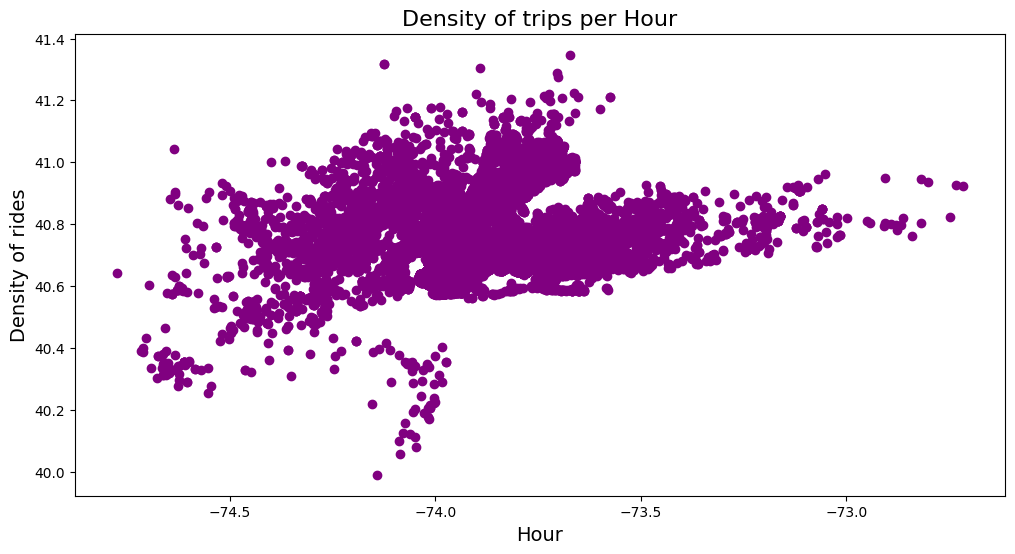

In [16]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.
